## Hotel_cancellation Algoritham

#### Import necessary library and  Data load

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [7]:
df=pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data cleaning part
- Remove missing value,outliers,Un-necessary rows
- Impute null values
- Imbalanced data
- Re-indexing

In [8]:
#Remove duplicate values
# df.duplicated().any()
df.drop_duplicates(inplace=False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
#missing values in percentage
100*(df.isnull().sum()/df.shape[0])


hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

####  Column Company hold 94.30% missing data so we can  drop this column   and agent column hold 13%

<AxesSubplot: >

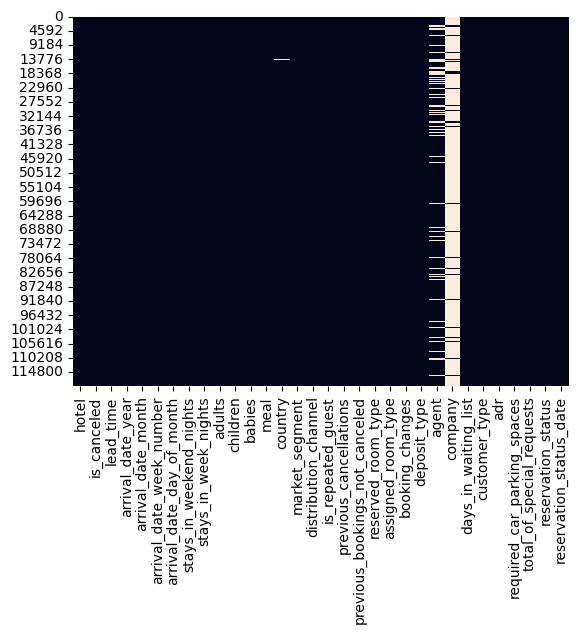

In [10]:
#Visualize null values using heatmap
sns.heatmap(df.isnull(), cbar=False)

In [11]:
#Thum rule is a column which have above 30% null value ,we can remove those column
df=df.drop('company',axis=1)

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
#fil Nan value with mean
find_mean=int(df['agent'].mean(skipna=True))
df['agent']=df['agent'].replace(np.NaN,find_mean)

In [15]:
#country null data
df['country'].isnull().sum()

488

In [16]:
# the country column we will fill it with the most frequent value of the column 

df['country'] = df['country'].fillna(df['country'].value_counts().index[0])
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [17]:
# Children null value fillup by mostly repeat values
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [18]:
df['children']=df['children'].fillna(0)

In [19]:
# No null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.598484,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915522,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


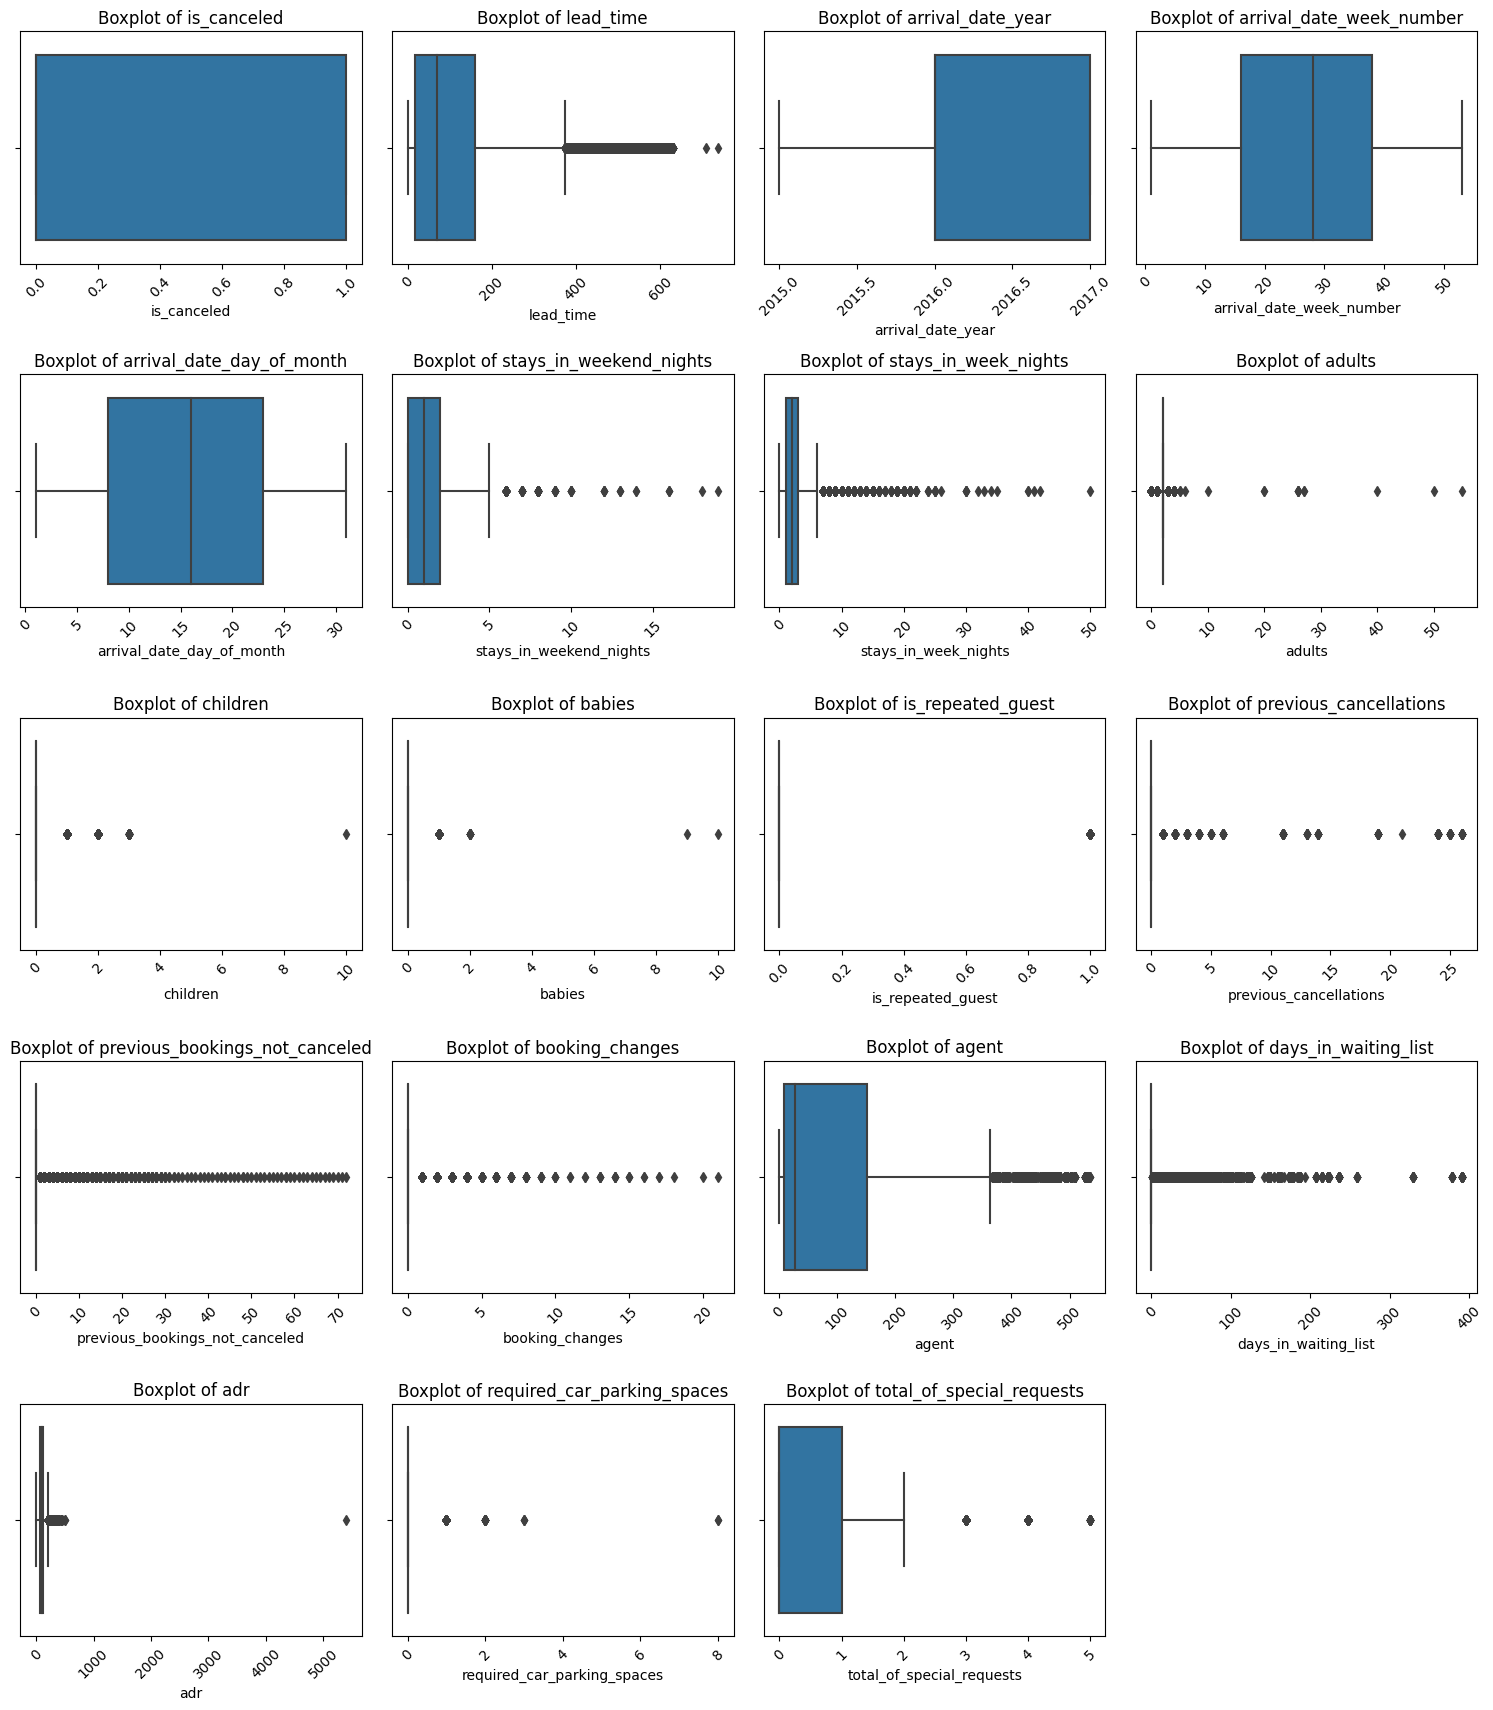

In [21]:
# Check outliers for numerical column
    
plt.figure(figsize=(15, 20))  
columns = df.describe().columns
total_plots = len(columns)
rows = 6 # You can adjust the number of rows and columns as needed
cols = total_plots // rows + 1

for x, column in enumerate(columns, start=1):
    plt.subplot(rows, cols, x)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [23]:
# some columns have Undefind value , we can remove this values
df.drop(df[df['market_segment']=='Undefined'].index,inplace=True)
df.drop(df[df['distribution_channel']=='Undefined'].index,inplace=True)
df.drop(df[df['meal']=='Undefined'].index,inplace=True)

In [24]:
# adults,children and babies can not be zero
all_three_zero=(df.babies==0)&(df.adults==0)&(df.children==0) 
df1=df[~all_three_zero]


In [25]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,86.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,86.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,86.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
#Co-relation with target column is_canceled
corr=df1.corr()['is_canceled'].abs().sort_values(ascending = False)
corr


is_canceled                       1.000000
lead_time                         0.294025
total_of_special_requests         0.237615
required_car_parking_spaces       0.196605
booking_changes                   0.143793
previous_cancellations            0.109454
is_repeated_guest                 0.084939
agent                             0.073465
previous_bookings_not_canceled    0.057824
days_in_waiting_list              0.057523
adults                            0.057480
adr                               0.046922
babies                            0.032437
stays_in_week_nights              0.027812
arrival_date_year                 0.016759
arrival_date_week_number          0.009356
arrival_date_day_of_month         0.005500
children                          0.004502
stays_in_weekend_nights           0.000734
Name: is_canceled, dtype: float64

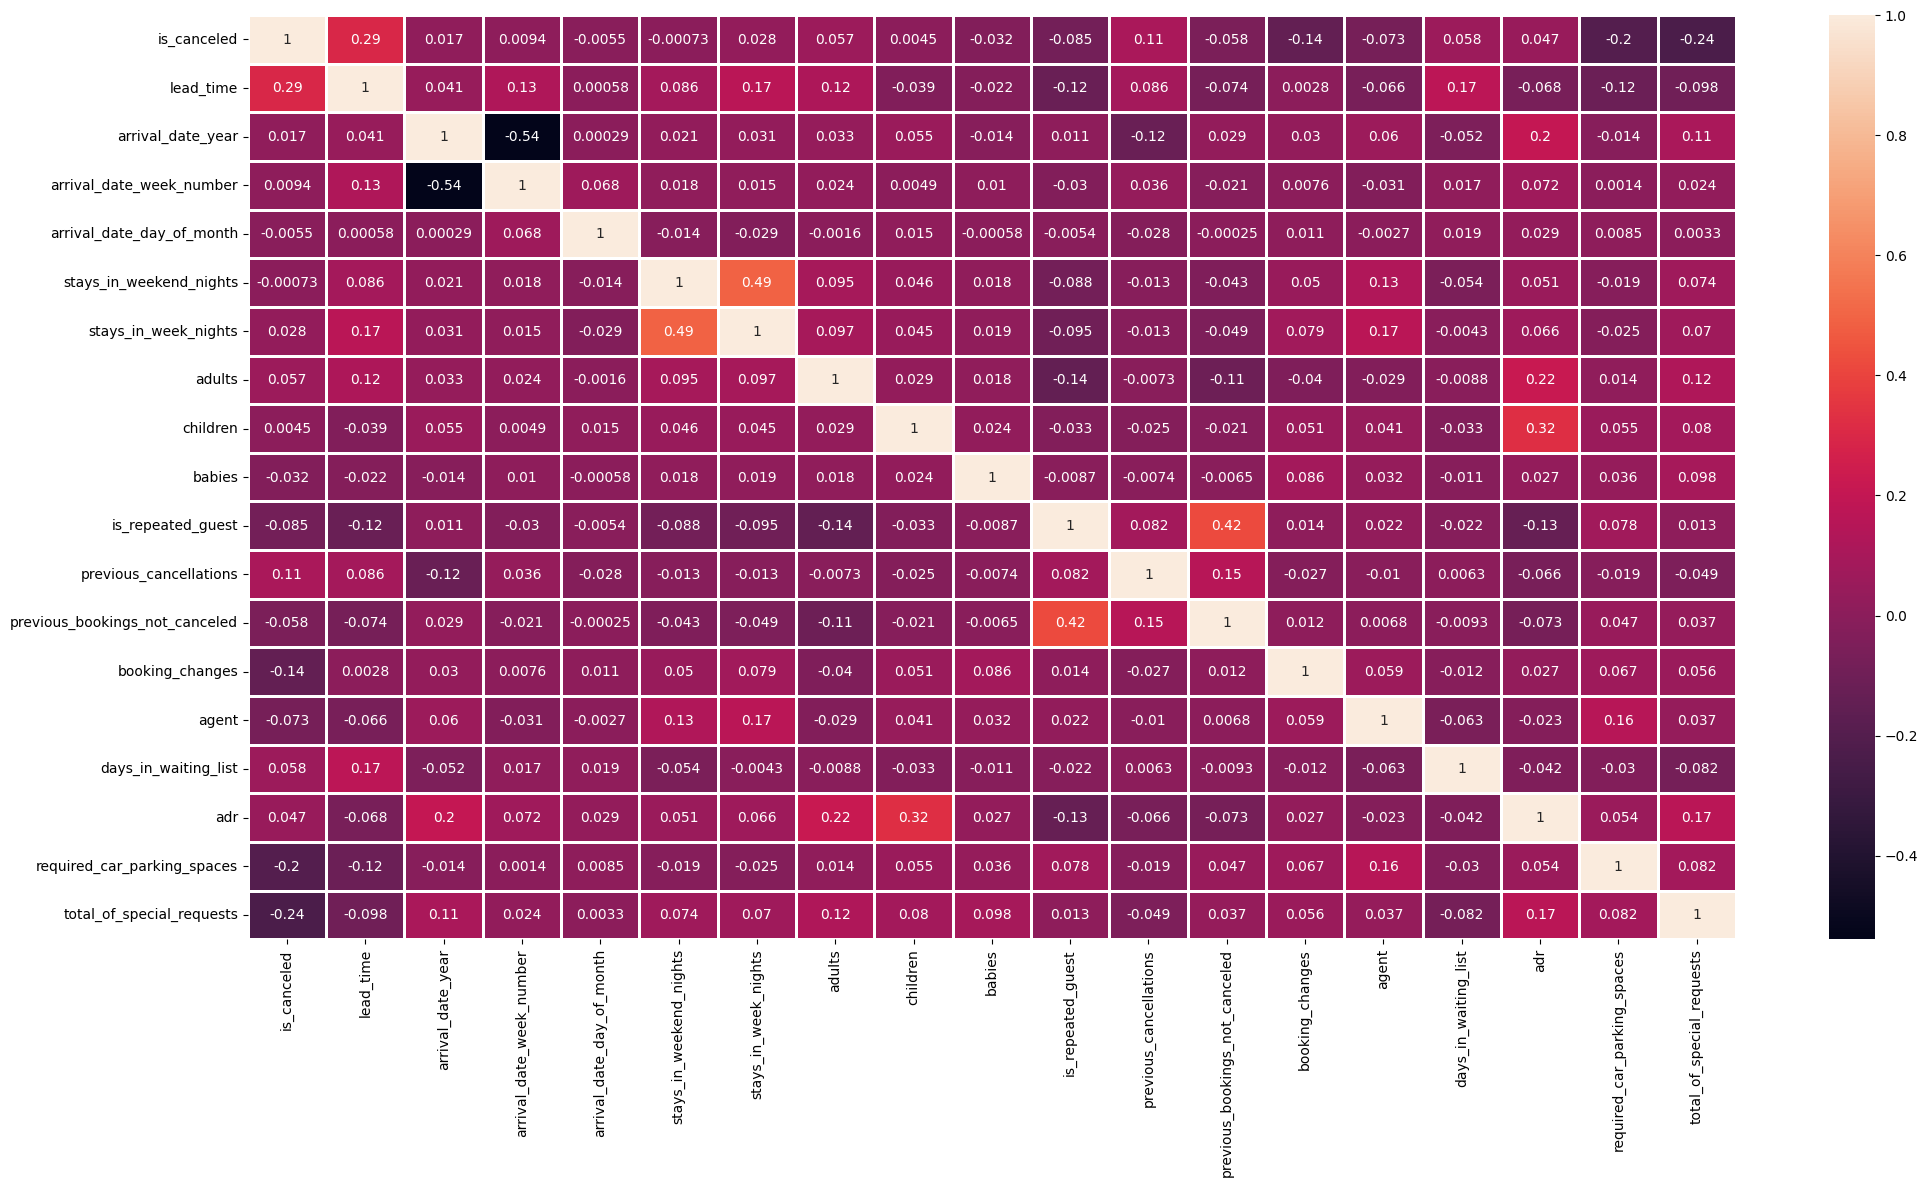

In [27]:
#Using heatmap ploat,visualize of co-relation among 'is_canceled' and other features
plt.figure(figsize = (24, 12))
corr = df1.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()


In [28]:
# Below mentioned mnay column that are not co-related with target columns
#['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 
#'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [29]:
df1.shape

(118036, 31)

In [30]:
#outlier of ADR column
df1 = df1.drop(df1[df1.adr < 0].index)
df1=df1.drop(df1[df1.adr > 5000].index)


In [31]:
df1.shape

(118034, 31)

In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [33]:
# getting  Total_night_stay column by adding stays_in_weekend_nights and stays_in_week_nights columns
df1['Total_night_stay']= df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

# getting  kids column by adding children and babies columns
df1['kids']=df1['children']+df1['babies']

In [34]:
#drop all 4 columns which we combined in 2 column
df1=df1.drop(columns=['babies','children','stays_in_weekend_nights','stays_in_week_nights'])
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_night_stay,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,86.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,86.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,86.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,0.0


## EDA Part


####  Cancellation

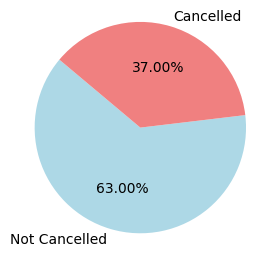

In [35]:
# We can show percentage of Not-cancelled and cancelled using chart .

Not_cancelled=df1['is_canceled'].value_counts()[0]
cancelled=df1['is_canceled'].value_counts()[1]
total_data=Not_cancelled + cancelled
percentage_not_cancelled = round(Not_cancelled / total_data, 2)
percentage_cancelled = round(cancelled / total_data, 2)

labels = ['Not Cancelled', 'Cancelled']
sizes = [percentage_not_cancelled, percentage_cancelled]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)

plt.axis('equal')
plt.show()

#### Deposit Type & cancellation

In [36]:
pd.crosstab(df['deposit_type'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
deposit_type,,
No Deposit,0.714790,0.285210
Non Refund,0.006441,0.993559
Refundable,0.777778,0.222222


- we can see that non refundable deposit has the highest cancellation rate

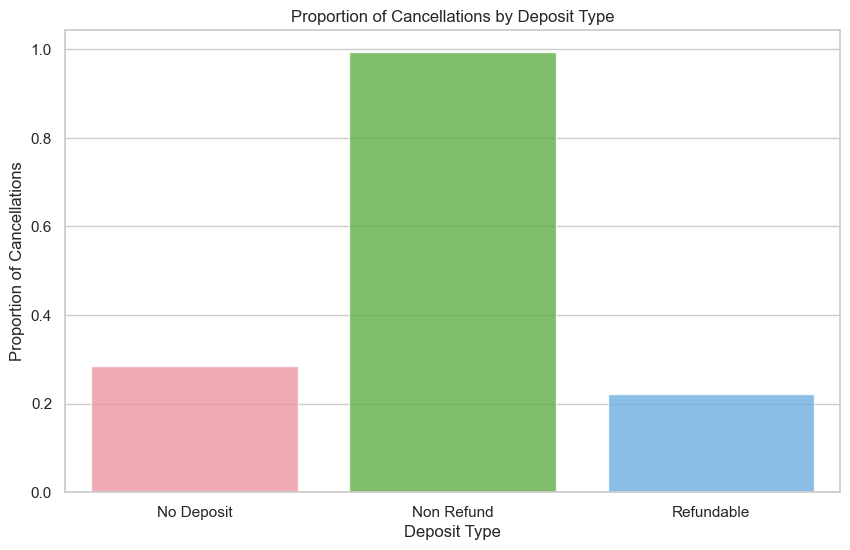

In [37]:

cross_tab = pd.crosstab(df['deposit_type'], df['is_canceled'], normalize='index')

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

colors = ["#1f77b4", "#ff7f0e"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x=cross_tab.index, y=cross_tab[1], data=cross_tab, alpha=0.8)
plt.xlabel("Deposit Type")
plt.ylabel("Proportion of Cancellations")
plt.title("Proportion of Cancellations by Deposit Type")
plt.show()

#### Lead time and cancellation

In [38]:
df['lead_time_month']=df['lead_time']//30
pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')

is_canceled,0,1
lead_time_month,,
0,0.817505,0.182495
1,0.633952,0.366048
2,0.603918,0.396082
3,0.557401,0.442599
4,0.562329,0.437671
5,0.532659,0.467341
6,0.548940,0.451060
7,0.529412,0.470588
8,0.448647,0.551353


- We can see that the longer lead time has a higher cancellation rate compared to the shorter

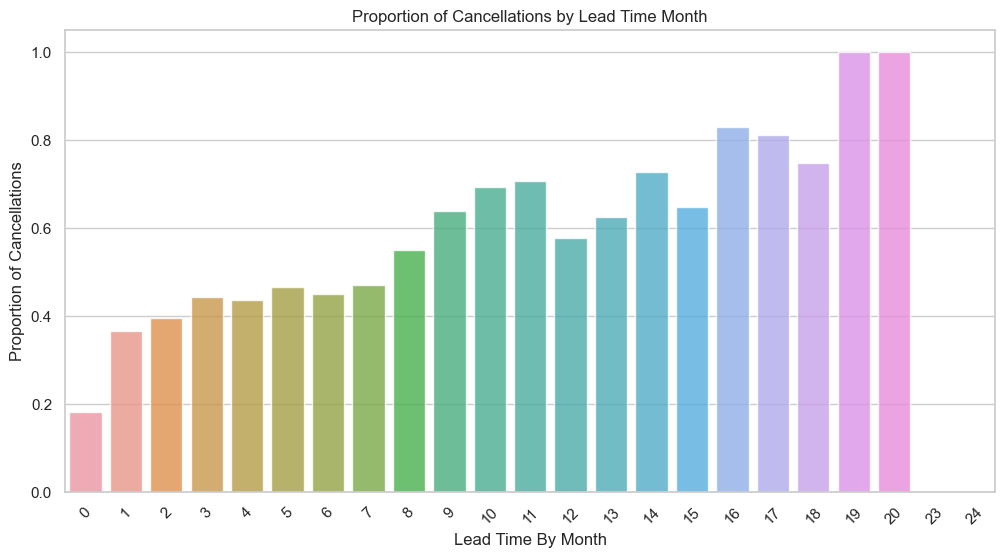

In [39]:
cross_tab=pd.crosstab(df['lead_time_month'], df['is_canceled'], normalize = 'index')
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

colors = ["#1f77b4", "#ff7f0e"]
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x=cross_tab.index, y=cross_tab[1], data=cross_tab, alpha=0.8)

plt.xlabel("Lead Time By Month")
plt.ylabel("Proportion of Cancellations")
plt.title("Proportion of Cancellations by Lead Time Month")

plt.xticks(rotation=45)  
plt.show()

#### Market_segment & Cancellation

In [40]:
#df.drop(df[df['market_segment']=='Undefined'].index,inplace=True)
pd.crosstab(df['market_segment'],df['is_canceled'],normalize='index')


is_canceled,0,1
market_segment,,
Aviation,0.780591,0.219409
Complementary,0.871099,0.128901
Corporate,0.812121,0.187879
Direct,0.846940,0.153060
Groups,0.376276,0.623724
Offline TA/TO,0.654146,0.345854
Online TA,0.632784,0.367216


- We can see here that group market segment has a higher cancel rate compared to it's confirmed rate

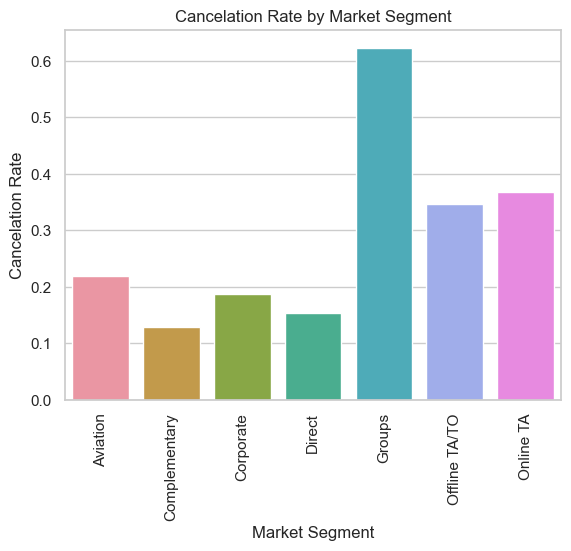

In [41]:
# Visualize market_segment features
crosstab_result=pd.crosstab(df['market_segment'],df['is_canceled'],normalize='index')

sns.barplot(data=crosstab_result, x=crosstab_result.index, y=1) 
plt.xlabel('Market Segment')
plt.ylabel('Cancelation Rate')
plt.title('Cancelation Rate by Market Segment')
plt.xticks(rotation=90)  
plt.show()

#### Distribution_channel & Cancellation

In [42]:
#df.drop(df[df['distribution_channel']=='Undefined'].index,inplace=True)
pd.crosstab(df['distribution_channel'],df['is_canceled'],normalize='index')

is_canceled,0,1
distribution_channel,,
Corporate,0.779186,0.220814
Direct,0.824937,0.175063
GDS,0.808290,0.191710
TA/TO,0.588574,0.411426


- TA/TO has a highest cancellation rate among all the distribution_channel 

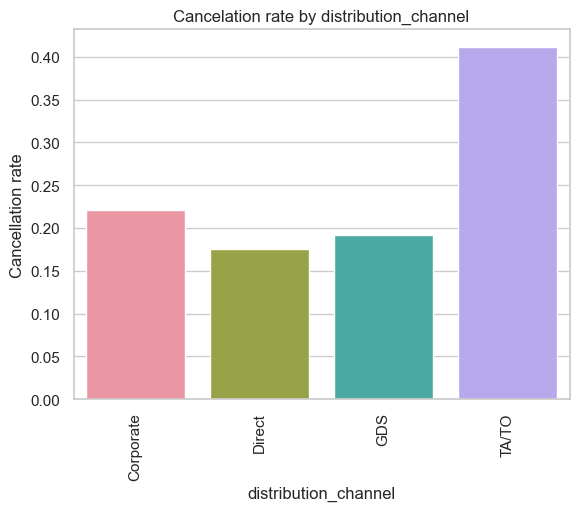

In [43]:
# more understanding by chart
crosstab_result=pd.crosstab(df['distribution_channel'],df['is_canceled'],normalize='index')
sns.barplot(data=crosstab_result,x=crosstab_result.index,y=1)
plt.xlabel('distribution_channel')
plt.ylabel('Cancellation rate')
plt.title('Cancelation rate by distribution_channel')
plt.xticks(rotation=90)
plt.show()

### Ancoding Part

In [44]:
# Find which columns catagorycal
df1.select_dtypes(include=['category', 'object']).columns


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [45]:
# reservation_status_date is splited into date,month and day
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

df1['reservation_status_year'] = df1['reservation_status_date'].dt.year
df1['reservation_status_month'] = df1['reservation_status_date'].dt.month
df1['reservation_status_day'] = df1['reservation_status_date'].dt.day
df1.drop(['reservation_status_date'] , axis = 1, inplace = True)
df1.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_night_stay,kids,reservation_status_year,reservation_status_month,reservation_status_day
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,...,Transient,0.0,0,0,Check-Out,0,0.0,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,...,Transient,0.0,0,0,Check-Out,0,0.0,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,...,Transient,75.0,0,0,Check-Out,1,0.0,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,...,Transient,75.0,0,0,Check-Out,1,0.0,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,...,Transient,98.0,0,1,Check-Out,2,0.0,2015,7,3


In [46]:
#df1.meal.unique()

In [47]:
#df1['hotel'].unique()

In [48]:
# Use the map function to replace values

df1['hotel'] = df1['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
df1['meal']=df1['meal'].map({'BB':0,'FB':1,'HB':2,'SC':3})
df1['arrival_date_month']=df1['arrival_date_month'].map({'December':12,'November':11,'October':10,'September':9,'August':8,'July':7,'June':6,'May':5,'April':4,'March':3,'February':2,'January':1})
df1['market_segment']=df1['market_segment'].map({'Aviation':0,'Groups':1,'Complementary':2,'Offline TA/TO':3,'Online TA':4,'Corporate':5,'Direct':6})
df1['distribution_channel']=df1['distribution_channel'].map({'Direct':0, 'Corporate':1, 'TA/TO':2, 'GDS':3})
df1['reserved_room_type']=df1['reserved_room_type'].map({'C':3, 'A':1, 'D':4, 'E':5, 'G':7, 'F':6, 'H':8, 'L':9, 'B':2})
df1['assigned_room_type']=df1['assigned_room_type'].map({'C':3, 'A':1, 'D':4, 'E':5, 'G':7, 'F':6, 'H':8, 'L':9, 'B':2,'K':10})
df1['deposit_type']=df1['deposit_type'].map({'No Deposit':1, 'Refundable':2, 'Non Refund':3})
df1['customer_type']=df1['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})
df1['reservation_status']=df1['reservation_status'].map({'Check-Out':1, 'Canceled':2, 'No-Show':3})
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_night_stay,kids,reservation_status_year,reservation_status_month,reservation_status_day
0,0,0,342,2015,7,27,1,2,0,PRT,...,0,0.0,0,0,1,0,0.0,2015,7,1
1,0,0,737,2015,7,27,1,2,0,PRT,...,0,0.0,0,0,1,0,0.0,2015,7,1
2,0,0,7,2015,7,27,1,1,0,GBR,...,0,75.0,0,0,1,1,0.0,2015,7,2
3,0,0,13,2015,7,27,1,1,0,GBR,...,0,75.0,0,0,1,1,0.0,2015,7,2
4,0,0,14,2015,7,27,1,2,0,GBR,...,0,98.0,0,1,1,2,0.0,2015,7,3


In [49]:
# corr=df1.corr()['is_canceled'].abs().sort_values(ascending = False)
# corr


In [50]:
#some columns less co-related with is_canceled column, so we can remove those columns
drop_column=['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes','reservation_status', 'country', 'days_in_waiting_list']
df1=df1.drop(drop_column,axis=1)

In [51]:
df1.head(15)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,market_segment,distribution_channel,...,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_night_stay,kids,reservation_status_year,reservation_status_month,reservation_status_day
0,0,0,342,7,27,1,2,0,6,0,...,86.0,0,0.00,0,0,0,0.0,2015,7,1
1,0,0,737,7,27,1,2,0,6,0,...,86.0,0,0.00,0,0,0,0.0,2015,7,1
2,0,0,7,7,27,1,1,0,6,0,...,86.0,0,75.00,0,0,1,0.0,2015,7,2
3,0,0,13,7,27,1,1,0,5,1,...,304.0,0,75.00,0,0,1,0.0,2015,7,2
4,0,0,14,7,27,1,2,0,4,2,...,240.0,0,98.00,0,1,2,0.0,2015,7,3
5,0,0,14,7,27,1,2,0,4,2,...,240.0,0,98.00,0,1,2,0.0,2015,7,3
6,0,0,0,7,27,1,2,0,6,0,...,86.0,0,107.00,0,0,2,0.0,2015,7,3
7,0,0,9,7,27,1,2,1,6,0,...,303.0,0,103.00,0,1,2,0.0,2015,7,3
8,0,1,85,7,27,1,2,0,4,2,...,240.0,0,82.00,0,1,3,0.0,2015,5,6
9,0,1,75,7,27,1,2,2,3,2,...,15.0,0,105.50,0,0,3,0.0,2015,4,22


In [52]:
corr=df1.corr()['is_canceled'].abs().sort_values(ascending = False)
corr


is_canceled                       1.000000
deposit_type                      0.479046
lead_time                         0.294042
market_segment                    0.245548
total_of_special_requests         0.237615
required_car_parking_spaces       0.196606
distribution_channel              0.171579
hotel                             0.135297
customer_type                     0.131759
reservation_status_year           0.115693
previous_cancellations            0.109455
is_repeated_guest                 0.084913
agent                             0.073447
reservation_status_month          0.072276
reserved_room_type                0.062814
previous_bookings_not_canceled    0.057816
adults                            0.057479
adr                               0.048059
reservation_status_day            0.034770
Total_night_stay                  0.020507
arrival_date_month                0.012255
meal                              0.009378
arrival_date_week_number          0.009359
arrival_dat

In [53]:
df1.shape

(118034, 25)

In [54]:
#since the data has been cleaned it has no more missing value and some randomness to the data we will export this data 
df1.to_csv("clean_data_of_hotel.csv",index=False)

In [102]:
df2=pd.read_csv("clean_data_of_hotel.csv")

In [56]:
df2.shape

(118034, 25)

In [57]:
df2.describe()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,market_segment,distribution_channel,...,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_night_stay,kids,reservation_status_year,reservation_status_month,reservation_status_day
count,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,...,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000,118034.000000
mean,0.670637,0.371995,104.278547,6.560932,27.200612,15.789315,1.859540,0.519842,3.551036,1.702755,...,85.660759,0.460943,102.026730,0.062795,0.575394,3.417880,0.112493,2016.092329,6.344341,15.666198
std,0.469984,0.483339,107.140634,3.076045,13.543307,8.779001,0.576146,1.015290,1.404925,0.674607,...,101.934719,0.830416,47.959638,0.245822,0.794220,2.535882,0.413815,0.715725,3.334023,8.776456
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,0.000000,0.000000,18.000000,4.000000,16.000000,8.000000,2.000000,0.000000,3.000000,2.000000,...,9.000000,0.000000,70.000000,0.000000,0.000000,2.000000,0.000000,2016.000000,3.000000,8.000000
50%,1.000000,0.000000,69.000000,7.000000,28.000000,16.000000,2.000000,0.000000,4.000000,2.000000,...,28.000000,0.000000,95.000000,0.000000,0.000000,3.000000,0.000000,2016.000000,6.000000,16.000000
75%,1.000000,1.000000,161.000000,9.000000,38.000000,23.000000,2.000000,0.000000,4.000000,2.000000,...,152.000000,0.000000,126.000000,0.000000,1.000000,4.000000,0.000000,2017.000000,9.000000,23.000000
max,1.000000,1.000000,737.000000,12.000000,53.000000,31.000000,55.000000,3.000000,6.000000,3.000000,...,535.000000,3.000000,510.000000,8.000000,5.000000,69.000000,10.000000,2017.000000,12.000000,31.000000


In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118034 entries, 0 to 118033
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118034 non-null  int64  
 1   is_canceled                     118034 non-null  int64  
 2   lead_time                       118034 non-null  int64  
 3   arrival_date_month              118034 non-null  int64  
 4   arrival_date_week_number        118034 non-null  int64  
 5   arrival_date_day_of_month       118034 non-null  int64  
 6   adults                          118034 non-null  int64  
 7   meal                            118034 non-null  int64  
 8   market_segment                  118034 non-null  int64  
 9   distribution_channel            118034 non-null  int64  
 10  is_repeated_guest               118034 non-null  int64  
 11  previous_cancellations          118034 non-null  int64  
 12  previous_booking

## Model Building

### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
#X=df2[['hotel','lead_time','market_segment','deposit_type','required_car_parking_spaces','total_of_special_requests','previous_cancellations','is_repeated_guest','customer_type','Total_night_stay','adults','kids']]


In [61]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'deposit_type', 'agent', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'Total_night_stay', 'kids', 'reservation_status_year',
       'reservation_status_month', 'reservation_status_day'],
      dtype='object')

In [62]:
df2.var()

hotel                                 0.220885
is_canceled                           0.233617
lead_time                         11479.115518
arrival_date_month                    9.462051
arrival_date_week_number            183.421151
arrival_date_day_of_month            77.070859
adults                                0.331944
meal                                  1.030814
market_segment                        1.973813
distribution_channel                  0.455094
is_repeated_guest                     0.030539
previous_cancellations                0.720324
previous_bookings_not_canceled        2.266457
reserved_room_type                    2.885299
deposit_type                          0.430136
agent                             10390.686860
customer_type                         0.689591
adr                                2300.126902
required_car_parking_spaces           0.060429
total_of_special_requests             0.630786
Total_night_stay                      6.430697
kids         

- Normalized numerical columns that have high variance

In [63]:
# df2['lead_time'] = np.log(df2['lead_time'] + 1)
# df2['arrival_date_week_number'] = np.log(df2['arrival_date_week_number'] + 1)
# df2['arrival_date_day_of_month'] = np.log(df2['arrival_date_day_of_month'] + 1)
# df2['agent'] = np.log(df2['agent'] + 1)
# df2['adr'] = np.log(df2['adr'] + 1)
# df2['reservation_status_day']=np.log(df2['reservation_status_day']+1)

In [64]:
df2['reservation_status_day']

0         1
1         1
2         2
3         2
4         3
         ..
118029    6
118030    7
118031    7
118032    7
118033    7
Name: reservation_status_day, Length: 118034, dtype: int64

In [65]:
X = df2.drop(columns=['is_canceled'])
y = df2['is_canceled']

In [66]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [67]:
X_train.shape[0],X_test.shape[0]

(82623, 35411)

## Classification Algorithams

In [68]:
# Below we implement various algoritham ,it means we can find algoritham which is given maximum accuracy   

### LogisticRegression

In [69]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr_for_train = lr.predict(X_train)

#for testing 
acc_lr = accuracy_score(y_test, y_pred_lr)
# for training
train_acc_lr = accuracy_score(y_train, y_pred_lr_for_train)

print(f"Training Accuracy : {train_acc_lr}")
print(f"Testing Accuracy : {acc_lr}")


#we see here that the model is not over fit or underfitting using logistic regression model

Training Accuracy : 0.7608172058627742
Testing Accuracy : 0.7602157521674056


In [70]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83     22325
           1       0.79      0.48      0.60     13086

    accuracy                           0.76     35411
   macro avg       0.77      0.70      0.71     35411
weighted avg       0.77      0.76      0.74     35411



## KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [73]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_for_train = knn.predict(X_train)

#for testing 
acc_lr = accuracy_score(y_test, y_pred_knn)
# for training
train_acc_lr = accuracy_score(y_train, y_pred_knn_for_train)

print(f"Training Accuracy : {train_acc_lr}")
print(f"Testing Accuracy : {acc_lr}")


#we see here that the model is not over fit or underfitting in KNN model



Training Accuracy : 0.9077254517507232
Testing Accuracy : 0.8636581853096496


In [74]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     22325
           1       0.89      0.73      0.80     13086

    accuracy                           0.86     35411
   macro avg       0.87      0.84      0.85     35411
weighted avg       0.87      0.86      0.86     35411



## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

y_pred_DT=DT.predict(X_test)
y_pred_DT_for_train=DT.predict(X_train)

# for testing
acc_dt=accuracy_score(y_test,y_pred_DT)
# for training
train_acc_dt=accuracy_score(y_train,y_pred_DT_for_train)

print(f"Training Accuracy :{train_acc_dt}")
print(f"testing Accuracy:{acc_dt}")

Training Accuracy :1.0
testing Accuracy:0.9496484143345288


In [77]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22325
           1       0.93      0.93      0.93     13086

    accuracy                           0.95     35411
   macro avg       0.95      0.95      0.95     35411
weighted avg       0.95      0.95      0.95     35411



## Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

y_pred_RF=RF.predict(X_test)
y_pred_RF_for_train=RF.predict(X_train)

# for testing
acc_RF=accuracy_score(y_test,y_pred_RF)
# for training
train_acc_RF=accuracy_score(y_train,y_pred_RF_for_train)

print(f"Training Accuracy :{train_acc_RF}")
print(f"testing Accuracy:{acc_RF}")

Training Accuracy :0.9999878968326011
testing Accuracy:0.9554940555194713


In [80]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     22325
           1       0.99      0.89      0.94     13086

    accuracy                           0.96     35411
   macro avg       0.96      0.94      0.95     35411
weighted avg       0.96      0.96      0.95     35411



In [99]:
names_index = df2.columns
i=0
print(len(names_index))
print(names_index)

25
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'deposit_type', 'agent', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'Total_night_stay', 'kids', 'reservation_status_year',
       'reservation_status_month', 'reservation_status_day'],
      dtype='object')


In [84]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [85]:
var_imp_rf = variable_importance(RF)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [86]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

### Important Features

In [87]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'reserved_room_type' has a Mean Decrease in Impurity of 0.12705
2. The feature 'reservation_status_year' has a Mean Decrease in Impurity of 0.10650
3. The feature 'is_canceled' has a Mean Decrease in Impurity of 0.10299
4. The feature 'arrival_date_month' has a Mean Decrease in Impurity of 0.08172
5. The feature 'reservation_status_month' has a Mean Decrease in Impurity of 0.08039
6. The feature 'arrival_date_week_number' has a Mean Decrease in Impurity of 0.06051
7. The feature 'lead_time' has a Mean Decrease in Impurity of 0.05914
8. The feature 'customer_type' has a Mean Decrease in Impurity of 0.05658
9. The feature 'required_car_parking_spaces' has a Mean Decrease in Impurity of 0.05018
10. The feature 'deposit_type' has a Mean Decrease in Impurity of 0.04461
11. The feature 'is_repeated_guest' has a Mean Decrease in Impurity of 0.03994
12. The feature 'meal' has a Mean Decrease in Impurity of 0.03396
13. The feature 'total_of_special_requests' has 

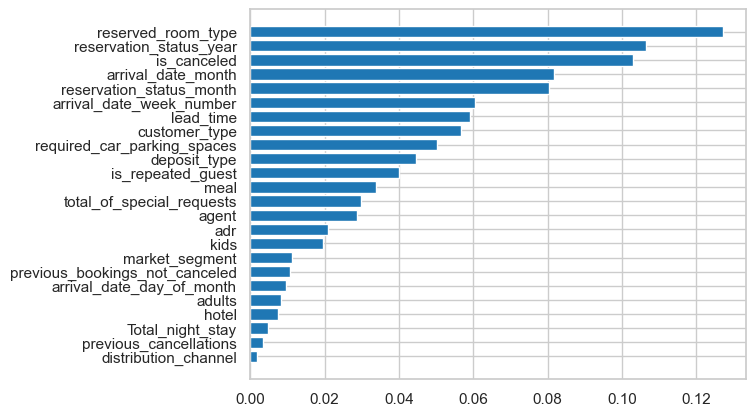

In [100]:
f_i = list(zip(names_index,RF.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

- Some Features are less important compare to other,So it can be removed

In [107]:
X1 = df2.drop(columns=['is_canceled','distribution_channel','previous_cancellations','Total_night_stay','hotel','adults','arrival_date_day_of_month','previous_bookings_not_canceled','market_segment','kids','adr'])
y1 = df2['is_canceled']
X_train1,X_test1, y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=10)

In [108]:
RF=RandomForestClassifier()
RF.fit(X_train1,y_train1)

y_pred_RF1=RF.predict(X_test1)
y_pred_RF_for_train1=RF.predict(X_train1)

# for testing
acc_RF1=accuracy_score(y_test1,y_pred_RF1)
# for training
train_acc_RF1=accuracy_score(y_train1,y_pred_RF_for_train1)

print(f"Training Accuracy :{train_acc_RF1}")
print(f"testing Accuracy:{acc_RF1}")

Training Accuracy :0.9992496036212677
testing Accuracy:0.960774900454661


In [109]:
print(classification_report(y_test1,y_pred_RF1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22325
           1       0.99      0.91      0.94     13086

    accuracy                           0.96     35411
   macro avg       0.97      0.95      0.96     35411
weighted avg       0.96      0.96      0.96     35411

